In [1]:
#Import modules
import numpy as np
import pandas as pd
import os.path
from pylab import *
import glob
import os
import re
from xlwt import Workbook
from scipy.optimize import curve_fit



from numpy import sqrt, pi, exp, linspace, loadtxt

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!python ratio_notebook.py
%run ratio_notebook.py

In [3]:
os.chdir(r'D:\Research\Experimental\Analysis\2017analysis\201702')
parentdir = os.getcwd()
#os.chdir('20160910_CuAzu655Ferri_asc_2ndtime')
os.chdir('Analysis_Sebby_March_2017')
#os.chdir('..')
print(parentdir)

D:\Research\Experimental\Analysis\2017analysis\201702


The file Point_A3_100mV(7)_60.5__30s_15.pt3.datn.em.plot does not exist
The file Point_A3_050mV(12)_60.5__30s_19.pt3.datn.em.plot does not exist
[-0.0055581094241654054, 0.012323771590442404, 0.0046511151418307571, 0.0054234741609156863, -0.0070657125729694983, -0.0065992766005312292, -0.019542915437595447, -0.031847219374286695, -0.0045849885855810506, 0.0061265562201454288]
[0.045926562142988916, 0.044805406358501103, 0.019148901958025905, 0.052904803756512457, 0.031303756354042186, 0.029286837759719634, 0.040947360502249806, 0.024152054865086512, 0.031385881367128859, 0.036675859490700513]
The (average) midpoint potential is according to timetrace/FCS: -0.00466733048818
using 10 different points
The (average) midpoint potential is according to FCS: 0.0356537424555
using 10 different points


()

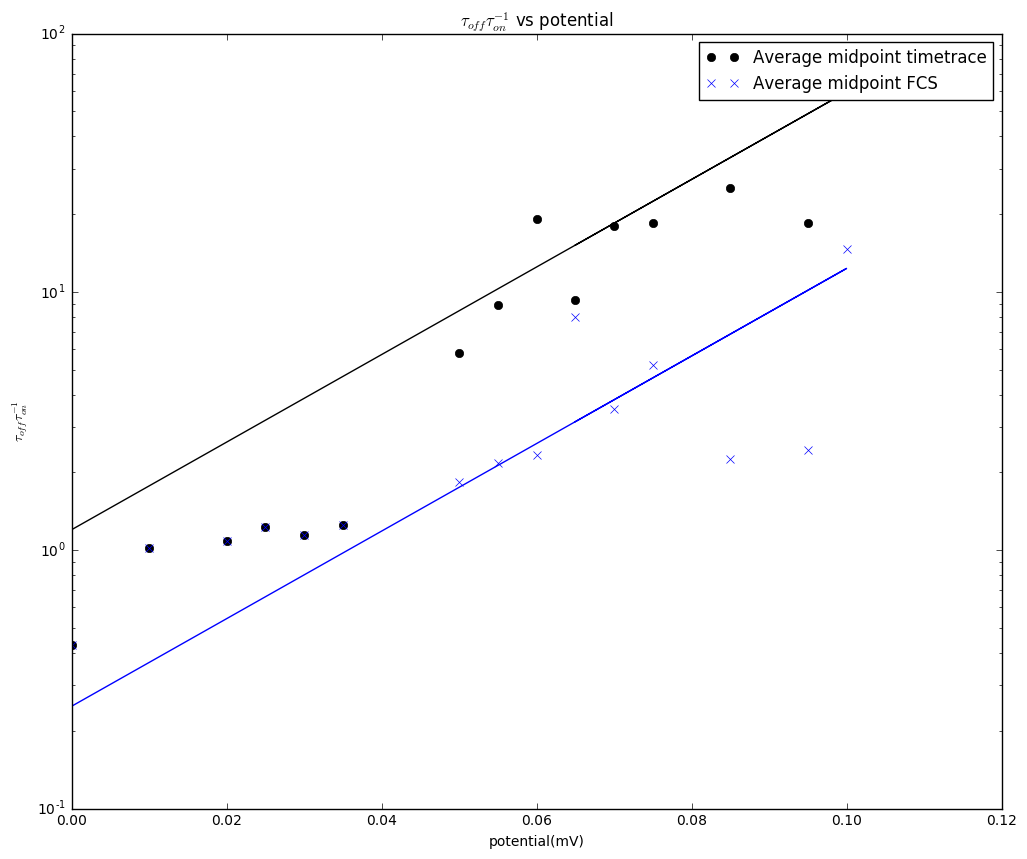

In [4]:
#************* t_on t_off^(-1) vs potential********************

pointnumbers = 35 #Change this to the minimal amount of points
pot = 15 #number of potentials
current_dir = 'S101d16Feb17_60.5_635_A3_CuAzu655' #foldername you want to work in.
protein_amount = 24 #number of proteins you want to be plotted (will plot the first x proteins)
#interested_protein_numbers = [0, 3, 8, 10, 11] #prot nr - 1
interested_protein_numbers = [0, 3, 8, 10, 11]
savename_file = 't_ratio_14Feb17.xls'
save_fig_name = 'bla.png'
minimal_pot = 40 #potential till timetrace t_on and t_off is sufficient. Potentials below this value = FCS
tminFCS = 0
tmaxFCS = 10000
minimal_points = 4 #minimal points of a given point to calculate the midpoint potential. Example:
#some protein were only active in 2 potentials. to filter these out, set a minimal amount of active potentials here.
t_ratio_notebook(pot, pointnumbers, current_dir, protein_amount, interested_protein_numbers, savename_file, save_fig_name, minimal_pot, tminFCS, tmaxFCS, minimal_points)

0.00205320598675
0.0593004899308
65


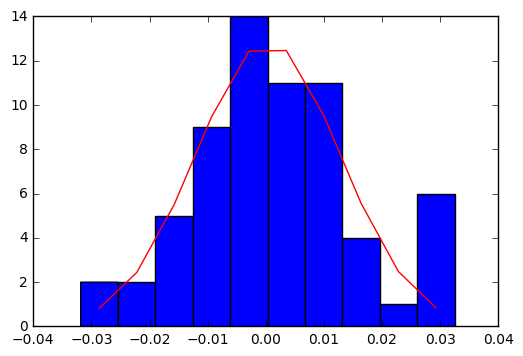

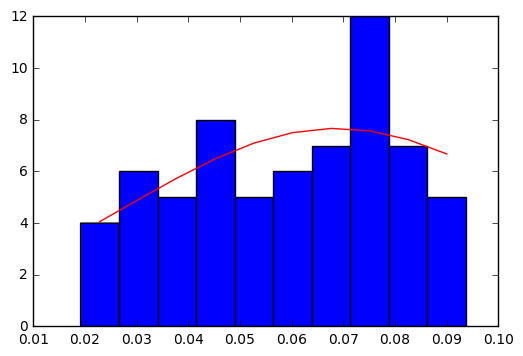

In [125]:
#day 1 10points S101d16Feb17_60.5_635_A3_CuAzu655
day_1_TT = [-0.005558109759356048, 0.012323771845788121, 0.0046511160240322825, 0.0054234739604488826, -0.0070657127072066865, -0.0065992765913591355, -0.019542915594567313, -0.031847219401617943, -0.0045882234644036629, 0.0061265562093619462]
day_1_FCS = [0.045926562088973381, 0.044805406504807792, 0.019148901952235821, 0.052904802404622683, 0.031303756334274381, 0.029286837747984008, 0.040947359810438837, 0.024152054334936977, 0.031372942820578481, 0.036675859338763231]
#day 2 17points S104d20Feb17_60.5_635_A1_CuAzu655
day_2_TT = [-0.01458995030430273, 0.00087568368286288412, -0.00040067608275495202, -0.0033075582693358426, -0.0029838366172998941, 0.019345563696057288, 0.0091042016283113831, -0.0041608486363576619, -0.0088896555753964074, -0.00082340010555137782, 0.031683395182030193, 0.0078693430857198349, 0.027453899201285388, 0.015028146902059289, 0.032466307023464903, 0.00072806029430103807, 0.02977262604326153]
day_2_FCS = [0.077738013222713814, 0.065227436282655579, 0.074898476189598676, 0.078853948964068568, 0.070262419499948783, 0.073485180642897441, 0.091733758844473365, 0.044636207453448755, 0.071459757609087807, 0.080437737130457487, 0.061812295776938003, 0.078403193491247733, 0.09374676274451213, 0.078742422456092115, 0.08554099576701639, 0.07907904663284028, 0.059486778305268606]
#day 3 10 points S101d16Feb17_60.5_635_A3_CuAzu655
day_3_TT = [-0.0055581011668454673, 0.012323771716061398, 0.0046511146623464056, 0.0054234747677500391, -0.0070657124938476945, -0.0065992765557433249, -0.01954291547644375, -0.03184721938941764, -0.0045882235458964008, 0.0061265582719170443]
day_3_FCS = [0.045926623052109622, 0.044805405927329477, 0.019148901673629305, 0.052904803398533512, 0.031303756357785456, 0.029286837721987674, 0.040947360193900766, 0.024152054465095933, 0.031372942867616535, 0.036675866068666053]
#day 4 17 points S101d15Feb17_62.2_635_A2_CuAzu655_2nd
day_4_TT = [-0.017426659034256754, 0.012041077705545605, 0.022804834117672968, 0.0064822510224358297, 0.0085486170247277074, -0.017244755883841369, 0.0094191613177173426, -0.00032774431528555291, 0.0063919618322929557, -0.010905716663243003, -0.0090547635946070966, 0.011191193487806533, 0.0093302473268332652, 0.026371973022887994, -0.0013162485852775555, -0.013606620072291003, -0.0015711932688824443]
day_4_FCS = [0.052595391575313635, 0.066627482217910539, 0.075495435938160063, 0.044478152664356917, 0.073255644421620275, 0.084744510803994658, 0.076046010724013041, 0.086549786084788069, 0.086964772523171058, 0.075525377813604189, 0.061822386524373669, 0.047825984083239528, 0.070877299017378464, 0.067422541852836901, 0.080478943938927697, 0.063649990258637656, 0.072924924425168985]
#day 5 11 points S101d14Feb17_60.5_635_A2_CuAzu655
day_5_TT = [-0.0066375967547319999, -0.013599724028533757, 0.0087601562126152204, 0.0096296464114512936, 0.0027504443716661327, 0.01594308009303563, -0.0055330656464860368, -0.0014176091654074263, -0.0079099217517773664, 0.029356322794657282, 0.015170808702652918]
day_5_FCS = [0.064022144467004535, 0.087723803505857317, 0.039536810483234604, 0.052925697100223837, 0.074454108759359622, 0.05498328822455488, 0.059114089020517679, 0.065314412181701489, 0.048967093241866343, 0.059912762473830955, 0.081699535100687865]
combined_TT = day_1_TT + day_2_TT + day_3_TT + day_4_TT + day_5_TT
combined_FCS = day_1_FCS + day_2_FCS + day_3_FCS + day_4_FCS + day_5_FCS
av_TT = sum(combined_TT)/len(combined_TT)
av_FCS = sum(combined_FCS)/len(combined_FCS)
print(av_TT)
print(av_FCS)
print(len(combined_FCS))

#plt.hist(day_1_TT)
#plt.hist(day_2_TT)
#plt.hist(day_3_TT)
#plt.hist(day_4_TT)
#plt.hist(combined_TT)
plt.figure()

n,bins_on1,patches = hist(combined_TT, bins = 10)
bin_centers_on = bins_on1[:-1] + 0.5 * (bins_on1[1:] - bins_on1[:-1])
def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))


popt_single, pcov_single = curve_fit(gaus, bin_centers_on, n)
plt.plot(bin_centers_on,gaus(bin_centers_on,*popt_single), color = 'r')

plt.figure()
n,bins_off1,patches = hist(combined_FCS, bins = 10)
bin_centers_off = bins_off1[:-1] + 0.5 * (bins_off1[1:] - bins_off1[:-1])
popt_FCS, pcov_FCS = curve_fit(gaus, bin_centers_off, n)
plt.plot(bin_centers_off,gaus(bin_centers_off,*popt_FCS), color = 'r')



[ 0.00256155]
[ 0.00084238]


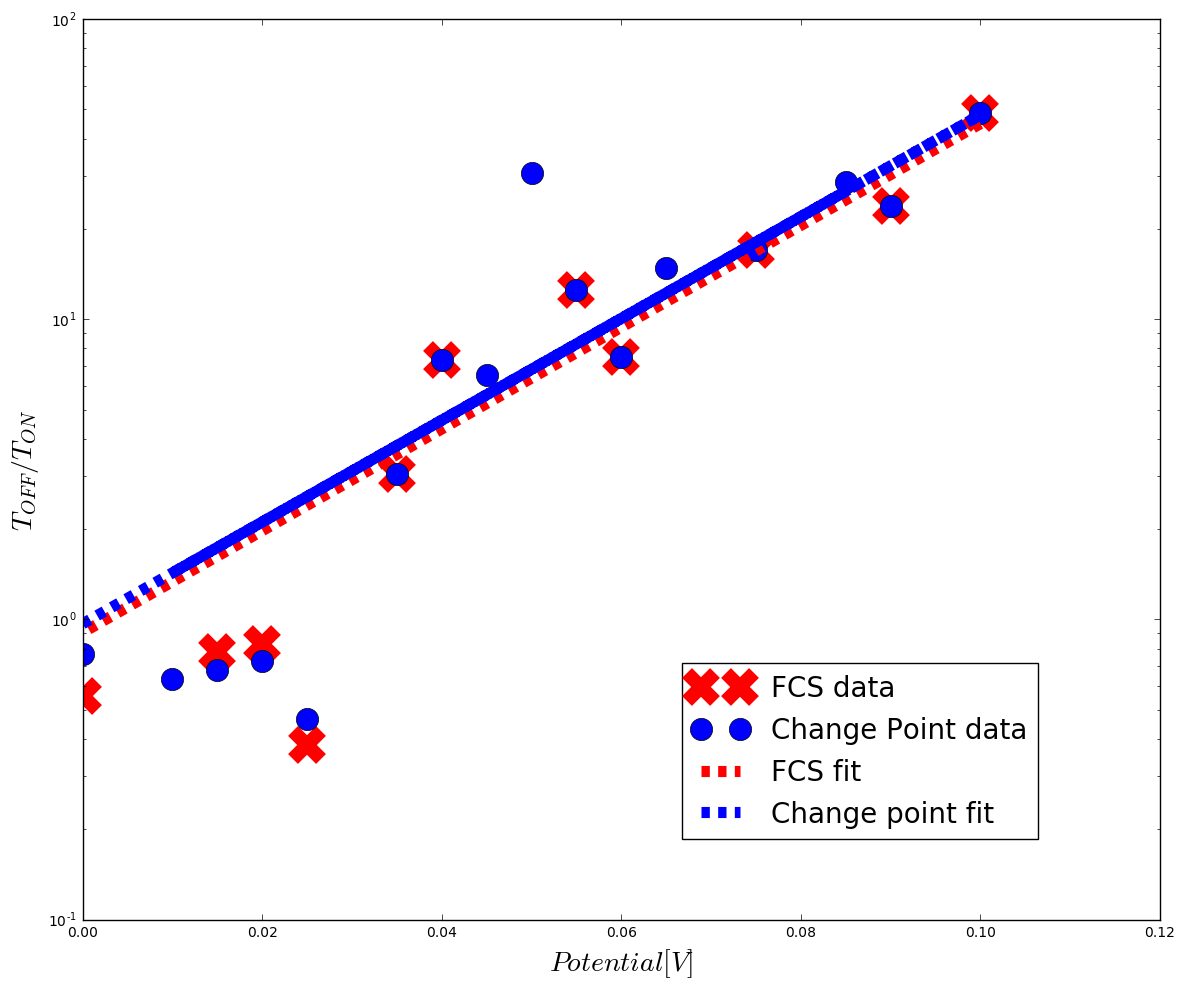

In [27]:
y_1 = [48.62951582331873, 23.904438776736455, 17.06620729364577, 7.5062066865097234, 12.536809680664424, 7.3409946000581145, 3.0493269466865054, 0.38173578812120001, 0.82946268632500009, 0.77861653017683341, 0.55526126763650008]
x_1 = [0.1, 0.09, 0.075, 0.06, 0.055, 0.04, 0.035, 0.025, 0.02, 0.015, 0]

y_2 = [0.7701837956762458, 0.6806879605521884, 0.7298681478069913, 0.4665120868638997, 3.0493269466865054, 7.3409946000581145, 30.81616944800298, 12.536809680664424, 7.5062066865097234, 17.06620729364577, 23.904438776736455, 48.62951582331873, 0.6328104286834932, 6.528531815223261, 14.815773477517531, 28.704428326174998]
x_2 = [0.0, 0.015, 0.02, 0.025, 0.035, 0.04, 0.05, 0.055, 0.06, 0.075, 0.09, 0.1, 0.01, 0.045, 0.065, 0.085]


plt.figure(figsize=(12,10))
plt.plot(x_1,y_1, 'x', color = 'r',label='FCS data', ms=20)
plt.plot(x_2,y_2, 'o', color = 'b', label='Change Point data', ms=16)


plt.yscale('log')

def nernst(x, a):
        return(10**((x - a) / 0.059))

popt_0, pcov_0 = curve_fit(nernst, x_1, y_1, p0 = 0.020, bounds = (0,np.inf))
popt_1, pcov_1 = curve_fit(nernst, x_2, y_2, p0 = 0.020, bounds = (0,np.inf))
plt.plot(x_1, nernst(x_1, *popt_0), 'r--', label='FCS fit', lw=8) 
plt.plot(x_2, nernst(x_2, *popt_1), 'b--', label='Change point fit', lw=8) 

xlabel('$Potential [V]$', fontsize=20)
ylabel('$T_{OFF}/T_{ON}$', fontsize=20)
legend(bbox_to_anchor=(0.9, 0.3), fontsize=20)
tight_layout()
savefig('onoff_ratio.pdf', dpi=300, transparent=True)
print(popt_0)
print(popt_1)